<a href="https://colab.research.google.com/github/Allanx495/Projects/blob/main/Car_price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction Project!
### Objective:
- Helping automobile buyers and sellers make smarter decisions by building a ML model based on essential features, and to bring overall transparency to the market.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Datasets/cardekho.csv')
df.head()


Mounted at /content/drive


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [2]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


(8128, 12)

In [4]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [5]:
#data cleaning
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
8123    False
8124    False
8125    False
8126     True
8127     True
Length: 8128, dtype: bool


In [6]:
df.drop_duplicates(inplace = True)
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
8121    False
8122    False
8123    False
8124    False
8125    False
Length: 6926, dtype: bool


In [7]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

In [8]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),208
engine,208


In [9]:
# Drop rows with any null values
df = df.dropna()

# Double check
print(df.isnull().sum())
print(f"New shape: {df.shape}")

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64
New shape: (6718, 12)


In [10]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),0
engine,0


In [87]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,6718.000000,6.718000e+03,6.718000e+03,6718.00000,6718.000000,6718.000000
mean,2013.609110,5.263196e+05,7.340230e+04,19.46531,1430.891337,5.434653
std,3.900648,5.235398e+05,5.869980e+04,4.04915,493.493277,0.984230
min,1994.000000,2.999900e+04,1.000000e+00,0.00000,624.000000,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,16.80000,1197.000000,5.000000
50%,2014.000000,4.200000e+05,6.822150e+04,19.44000,1248.000000,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,22.50000,1498.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.00000,3604.000000,14.000000


In [86]:
# SEPERATE name into brand and model
df = df.copy()

df['brand'] = df['name'].apply(lambda x: x.split(' ')[0])
df['model'] = df['name'].apply(lambda x: ' '.join(x.split(' ')[1:]))

df[['name', 'brand', 'model']].head()

,name,brand,model
0,Maruti Swift Dzire VDI,Maruti,Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,Skoda,Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi,Honda,City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel,Hyundai,i20 Sportz Diesel
4,Maruti Swift VXI BSIII,Maruti,Swift VXI BSIII


In [13]:
df.head()# brand and model is at the end

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brand,model
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,Maruti,Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,Honda,City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,Hyundai,i20 Sportz Diesel
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,Maruti,Swift VXI BSIII


In [14]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats', 'brand', 'model'],
      dtype='object')

In [15]:
df.query('brand == "Ford"') # getting a sense of the data, ford is my favorite


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,brand,model
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.1,5.0,Ford,Figo Diesel Celebration Edition
65,Ford Figo 1.2P Titanium MT,2017,600000,25000,Petrol,Individual,Manual,Third Owner,18.16,1196.0,86.8,5.0,Ford,Figo 1.2P Titanium MT
81,Ford EcoSport 1.5 TDCi Titanium Plus BSIV,2015,610000,90000,Diesel,Individual,Manual,First Owner,22.77,1498.0,98.59,5.0,Ford,EcoSport 1.5 TDCi Titanium Plus BSIV
106,Ford Freestyle Titanium Petrol BSIV,2020,400000,5000,Petrol,Individual,Manual,Second Owner,19.00,1194.0,94.68,5.0,Ford,Freestyle Titanium Petrol BSIV
122,Ford EcoSport 1.5 Diesel Titanium Plus BSIV,2017,850000,76139,Diesel,Individual,Manual,First Owner,23.00,1498.0,98.96,5.0,Ford,EcoSport 1.5 Diesel Titanium Plus BSIV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8082,Ford Fiesta 1.4 Duratorq EXI,2007,125000,110000,Diesel,Individual,Manual,Third Owner,17.80,1399.0,68,5.0,Ford,Fiesta 1.4 Duratorq EXI
8095,Ford Figo Diesel Titanium,2012,260000,194000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68,5.0,Ford,Figo Diesel Titanium
8097,Ford EcoSport 1.5 Diesel Titanium BSIV,2018,880000,65000,Diesel,Individual,Manual,First Owner,23.00,1498.0,98.96,5.0,Ford,EcoSport 1.5 Diesel Titanium BSIV
8109,Ford Freestyle Titanium Plus Diesel BSIV,2018,750000,24000,Diesel,Individual,Manual,First Owner,24.40,1498.0,98.63,5.0,Ford,Freestyle Titanium Plus Diesel BSIV


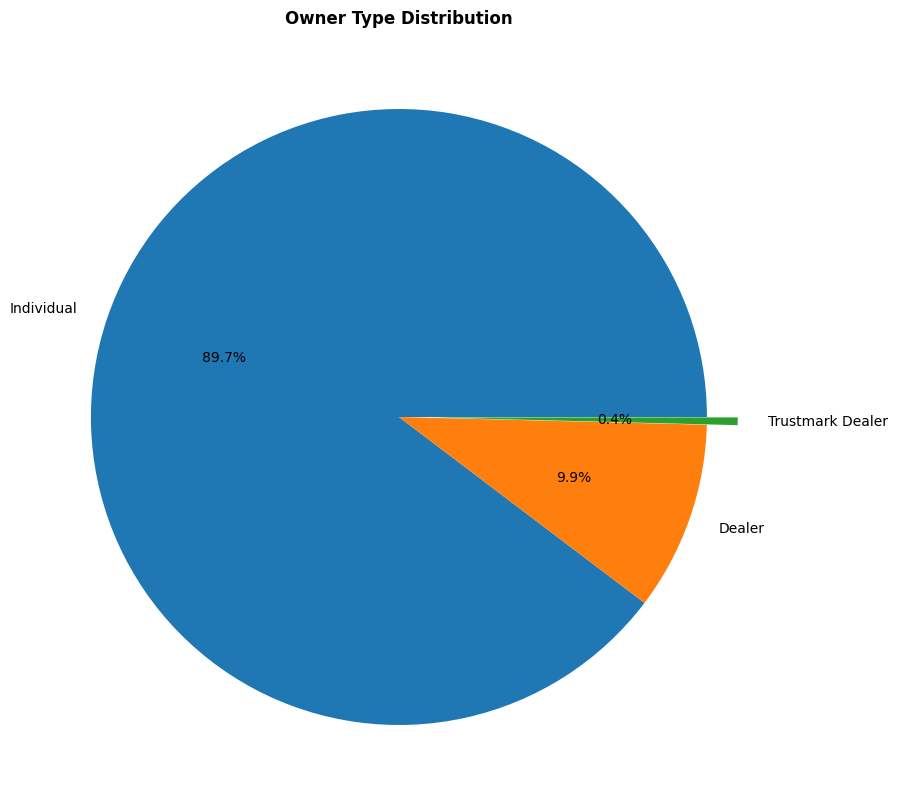

In [24]:
# Pie chart of owner type

seller_types = df['seller_type'].unique()

# Explode feature on the lowest slice for better readability
myexplode = [0.1 if seller == 'Trustmark Dealer' else 0 for seller in seller_types]

#Plotting
plt.figure(figsize=(10, 10))
df['seller_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=myexplode)
plt.title('Owner Type Distribution', weight='bold')
plt.ylabel('')
plt.show()

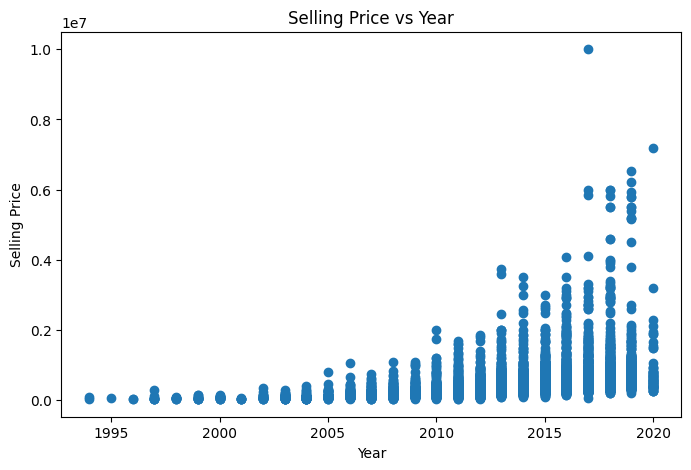

In [25]:
#Selling Price by Year
plt.figure(figsize=(8,5))
plt.scatter(df['year'], df['selling_price'])
plt.title('Selling Price vs Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

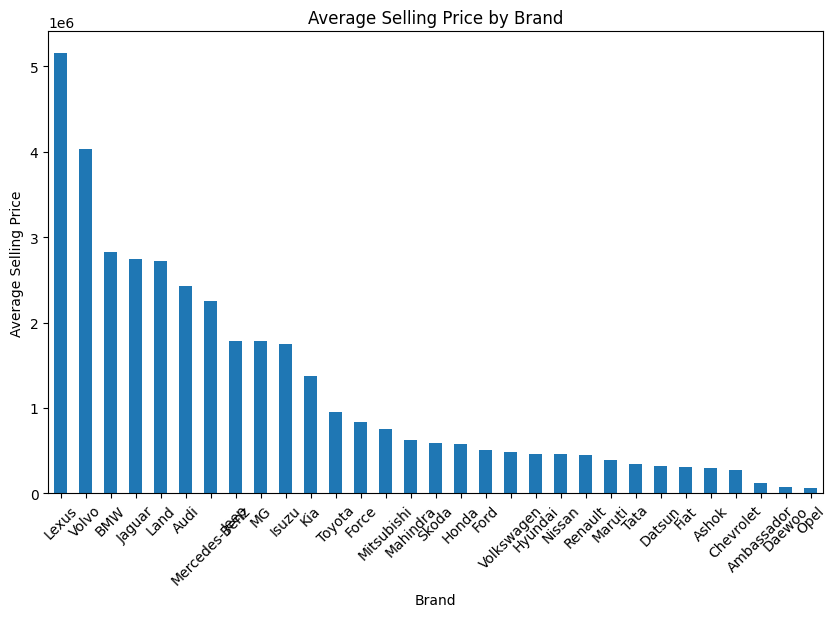

In [26]:
# Average Selling Price by Brand
brand_price = df.groupby('brand')['selling_price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
brand_price.plot(kind='bar')
plt.title('Average Selling Price by Brand')
plt.ylabel('Average Selling Price')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.show()

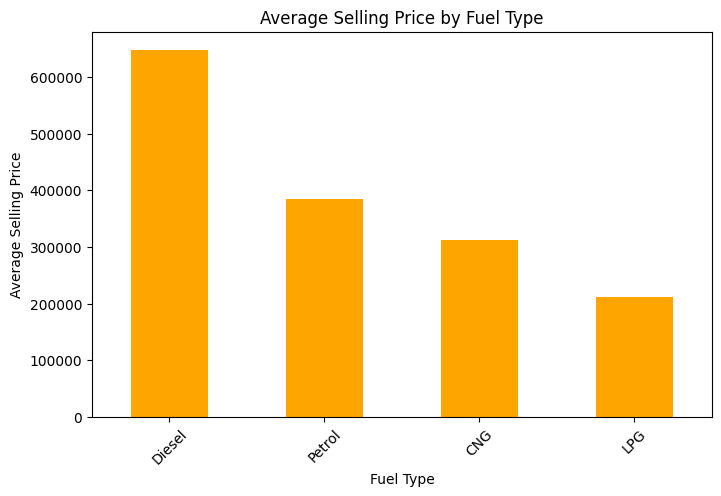

In [27]:
#Avergae selling Price by Fuel Type
fuel_price = df.groupby('fuel')['selling_price'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
fuel_price.plot(kind='bar', color='orange')
plt.title('Average Selling Price by Fuel Type')
plt.ylabel('Average Selling Price')
plt.xlabel('Fuel Type')
plt.xticks(rotation=45)
plt.show()

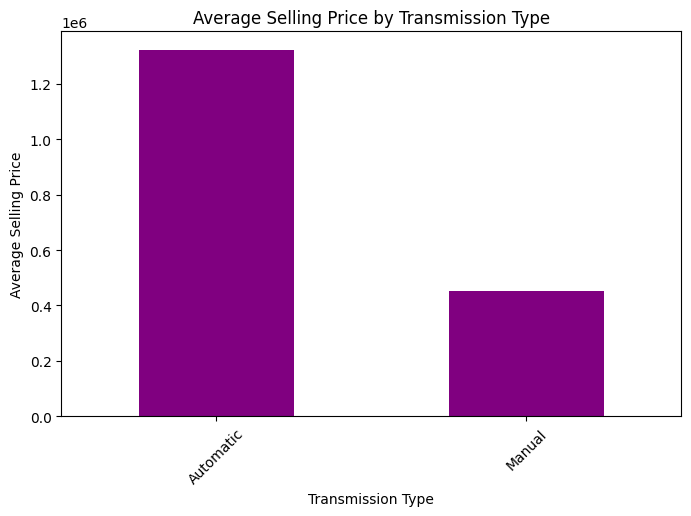

In [28]:
# Average Selling Price vs Transmission
trans_price = df.groupby('transmission')['selling_price'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
trans_price.plot(kind='bar', color='purple')
plt.title('Average Selling Price by Transmission Type')
plt.ylabel('Average Selling Price')
plt.xlabel('Transmission Type')
plt.xticks(rotation=45)
plt.show()

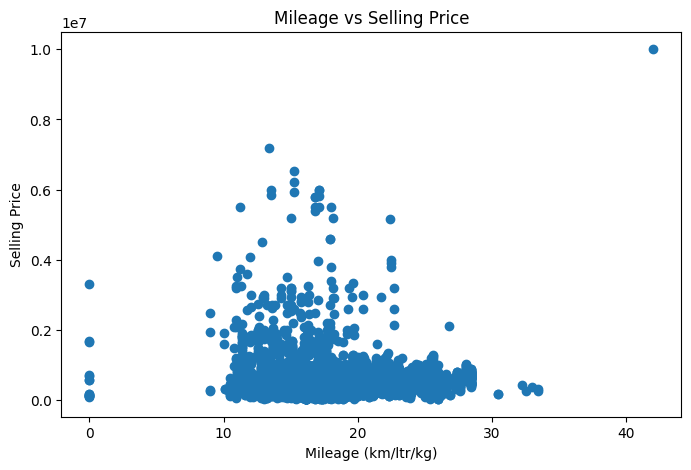

In [29]:
# Mileage vs Selling Price
plt.figure(figsize=(8,5))
plt.scatter(df['mileage(km/ltr/kg)'], df['selling_price'])
plt.title('Mileage vs Selling Price')
plt.xlabel('Mileage (km/ltr/kg)')
plt.ylabel('Selling Price')
plt.show()

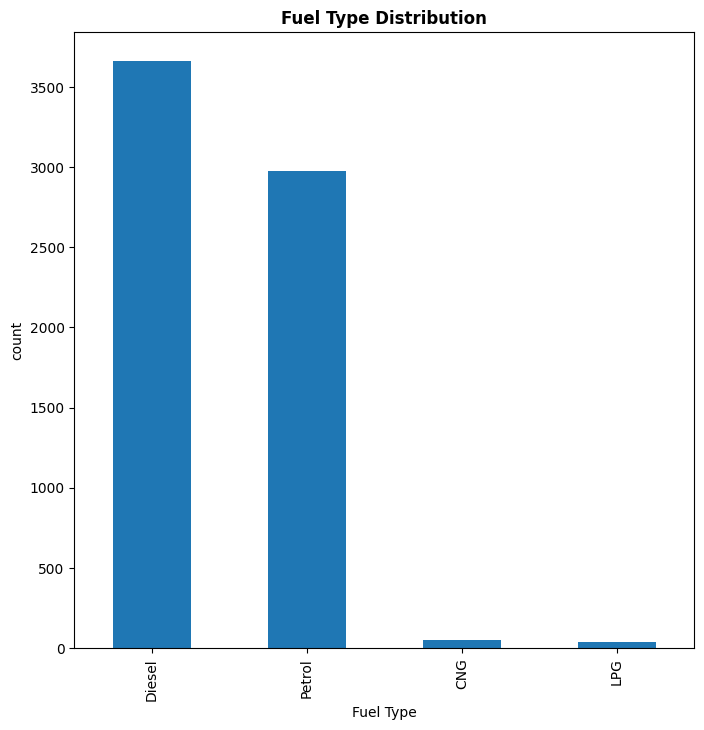

In [35]:
# Fix this make it better
plt.figure(figsize=(8,8))
df['fuel'].value_counts().plot(kind='bar')
plt.title('Fuel Type Distribution', weight='bold')
plt.ylabel('count')
plt.xlabel('Fuel Type')
plt.show()

Correlation Matrix:
                        year  selling_price  km_driven  mileage(km/ltr/kg)  \
year                1.000000       0.427367  -0.387796            0.366694   
selling_price       0.427367       1.000000  -0.161311           -0.108344   
km_driven          -0.387796      -0.161311   1.000000           -0.196494   
mileage(km/ltr/kg)  0.366694      -0.108344  -0.196494            1.000000   
engine             -0.019074       0.442857   0.253339           -0.578483   
seats               0.023632       0.158111   0.207957           -0.459624   

                      engine     seats  
year               -0.019074  0.023632  
selling_price       0.442857  0.158111  
km_driven           0.253339  0.207957  
mileage(km/ltr/kg) -0.578483 -0.459624  
engine              1.000000  0.657798  
seats               0.657798  1.000000  


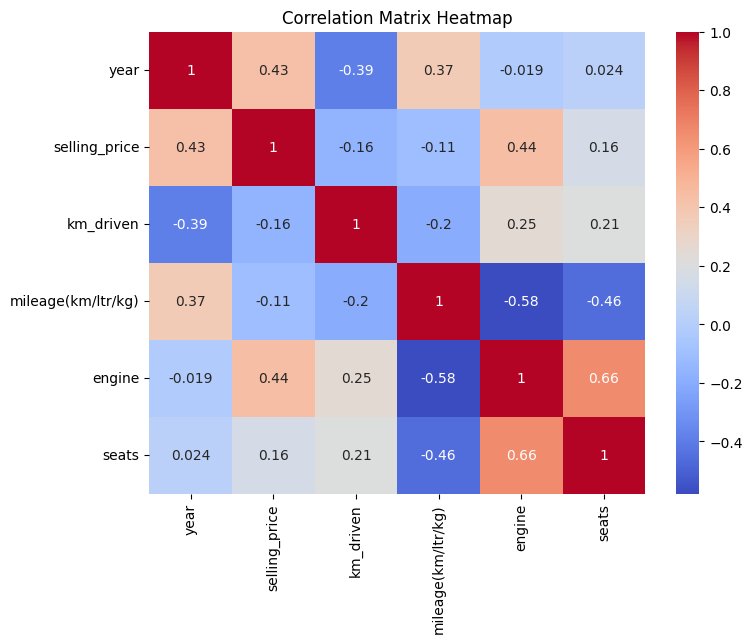

In [36]:
# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numerical_features.corr()

print("Correlation Matrix:")
print(corr_matrix)

# Visualize the correlation with a heat map
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Features and target
y = df['selling_price']
X = df[['mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']]

# Convert columns to numeric, handling errors
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Drop rows with any NaN values
X = X.dropna()
y = y[X.index]  # Align y with the dropped rows in X

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Evaluate
print('MSE:', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))

MSE: 99662907401.69559
R²: 0.5458116233164577


<ipython-input-37-0521fdb3103a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.to_numeric(X[col], errors='coerce') # 'coerce' will replace non-numeric values with NaN


In [38]:
# Features
X = df[['year', 'engine', 'max_power', 'mileage(km/ltr/kg)', 'seats',
        'fuel', 'seller_type', 'transmission', 'owner', 'brand', 'model']]
y = df['selling_price']

# Encode categoricals
X = pd.get_dummies(X, drop_first=True)

# 20/80 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Evaluate
print('MSE:', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))


MSE: 892146043519.0826
R²: -4.062688687578461


In [39]:
from sklearn.ensemble import RandomForestRegressor

# Model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Predict
y_pred = forest_model.predict(X_test)

# Evaluate
print('MSE:', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))


MSE: 24381984273.223835
R²: 0.8616388013403481


In [40]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=20,          # Only try 20 random combinations
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, scoring='r2', verbose=2)

In [41]:
print(random_search.best_params_)
print(random_search.best_score_)


{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
0.8252445537476715


In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

best_rf = RandomForestRegressor(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=None,
    random_state=42
)

best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


R² score: 0.8634
Mean Squared Error (MSE): 12007066841.03
Mean Absolute Error (MAE): 69478.47


In [43]:
# Check average of your y_test values
print(y_test.mean())


505676.29613095237


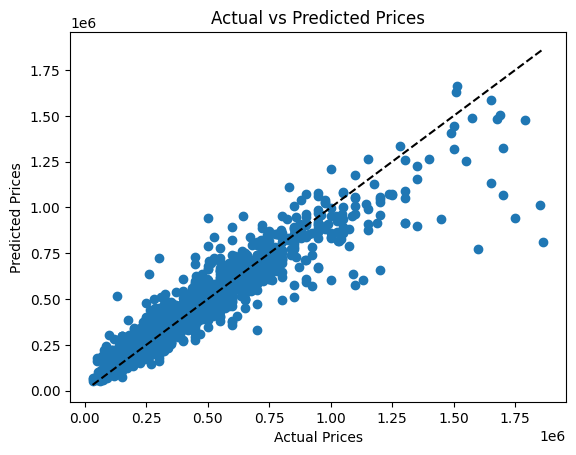

In [82]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Model
rf = RandomForestRegressor(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=30, scoring='r2',
                                   cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

# Best model
best_rf = random_search.best_estimator_

# Predict
y_pred = best_rf.predict(X_test)

# Evaluate
print('MSE:', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))

# See best parameters
print("Best parameters:", random_search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
MSE: 20841773121.01269
R²: 0.8817285468278032
Best parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


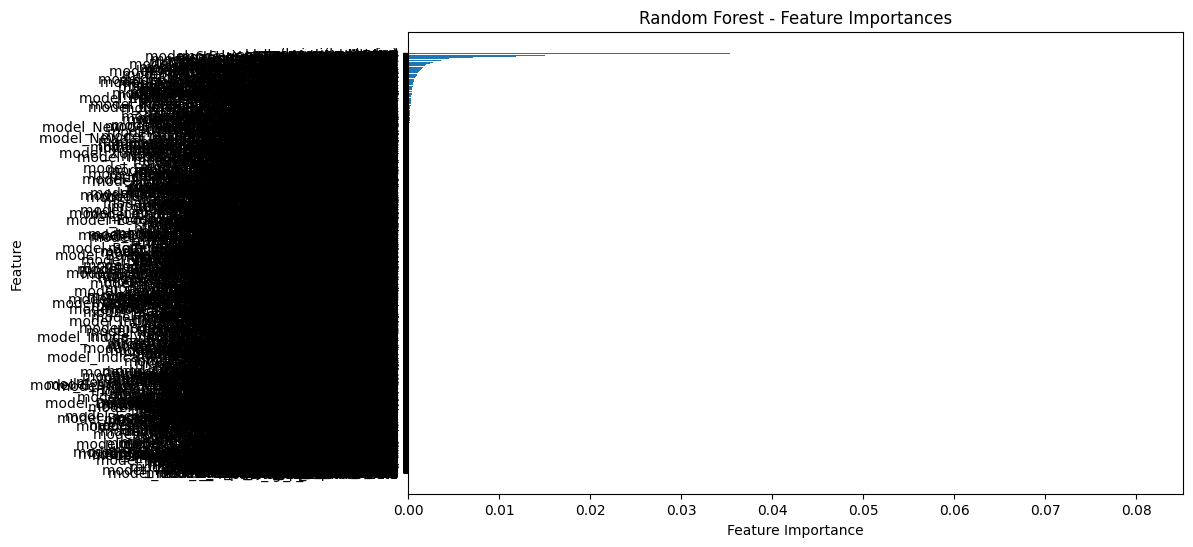

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the best model
importances = best_rf.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest - Feature Importances')
plt.gca().invert_yaxis()
plt.show()

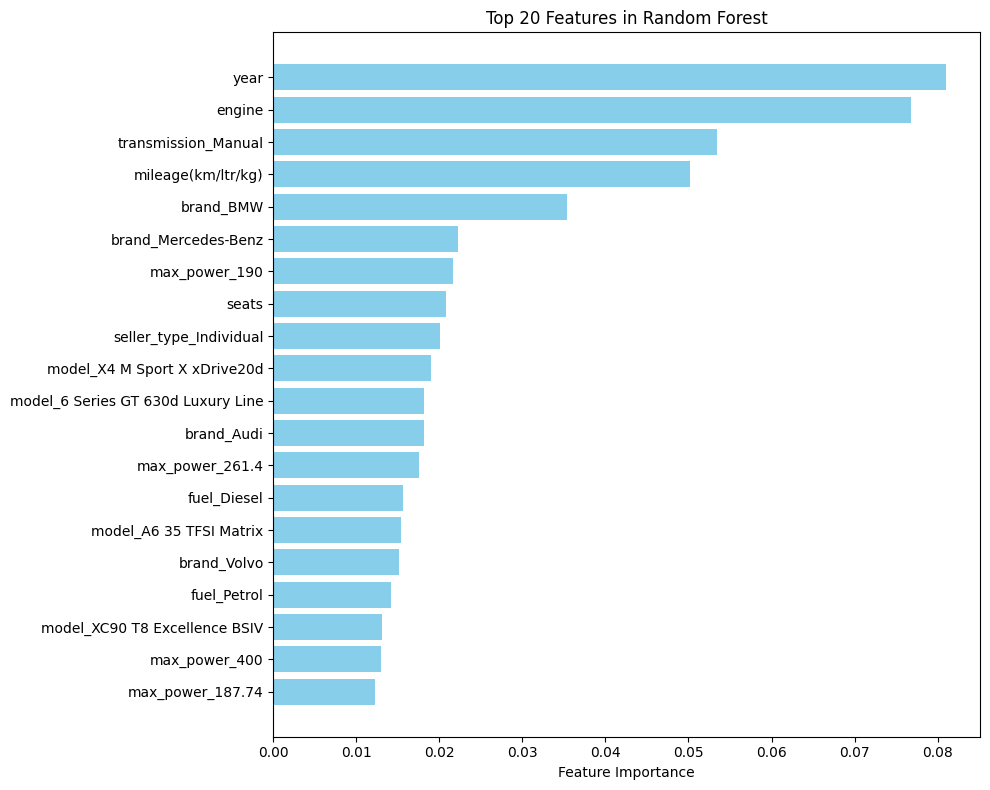

In [47]:
# This chart highlights the top 20 features the model found most useful when predicting car prices.
top_n = 20
importance_df_top = importance_df.head(top_n)

plt.figure(figsize=(10, 8))
plt.barh(importance_df_top['Feature'], importance_df_top['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title(f'Top {top_n} Features in Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

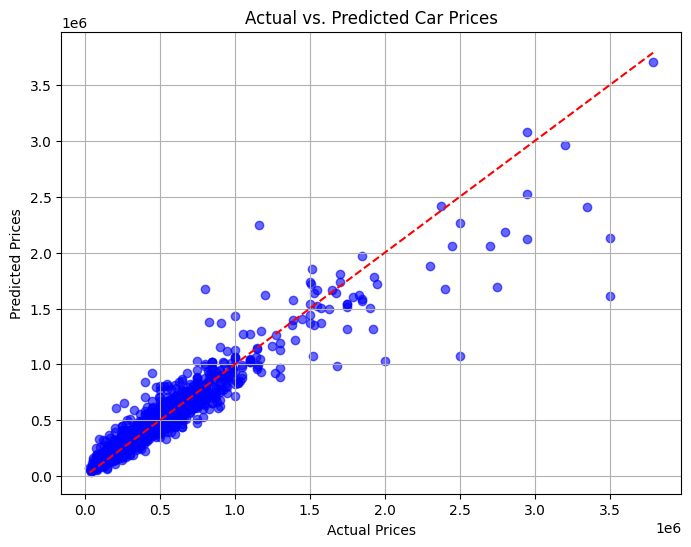

In [49]:
# scatter plot of actual vs predicted car prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Car Prices')
plt.grid(True)
plt.show()

In [ ]:
# The points closely follow the red dashed line, indicating high accuracy between predicted and true prices.
# Some spread is visible, especially in high-value cars, which is expected due to fewer training examples in that range.
# This plot visually confirms the high R² score of 0.88 and validates model performance.

In [50]:
# Remove top 2% most expensive cars (outliers)
price_threshold = df['selling_price'].quantile(0.98)
df_filtered = df[df['selling_price'] <= price_threshold]

X = df_filtered.drop('selling_price', axis=1)
y = df_filtered['selling_price']

X = pd.get_dummies(X, drop_first=True)

# 80/20 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

best_rf = RandomForestRegressor(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=None,
    random_state=42
)

best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"✅ New R² score after removing outliers: {r2:.4f}")
print(f"📉 Mean Squared Error (MSE): {mse:,.2f}")
print(f"📉 Mean Absolute Error (MAE): {mae:,.2f}")

✅ New R² score after removing outliers: 0.8634
📉 Mean Squared Error (MSE): 12,007,066,841.03
📉 Mean Absolute Error (MAE): 69,478.47


In [ ]:
# Even thoough the R^2 score was lower.... the MSE was lower (by 8 mil) which is helpful because it means the model is more consistent.

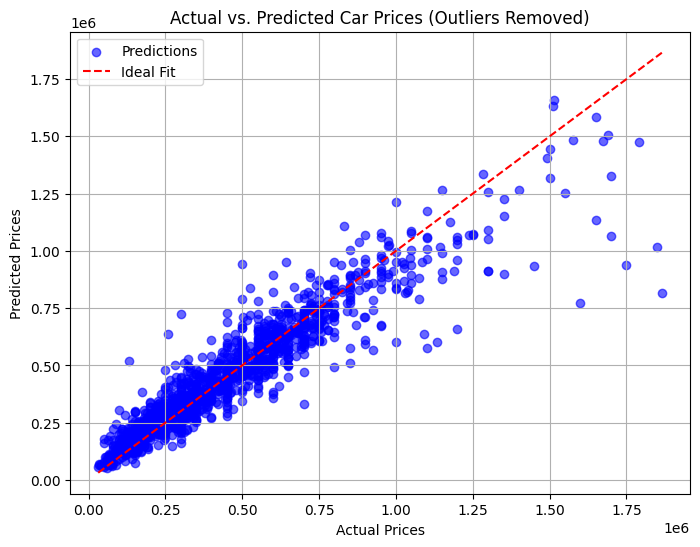

In [51]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted prices with 2% outliers removed
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Car Prices (Outliers Removed)')
plt.grid(True)
plt.legend()
plt.show()

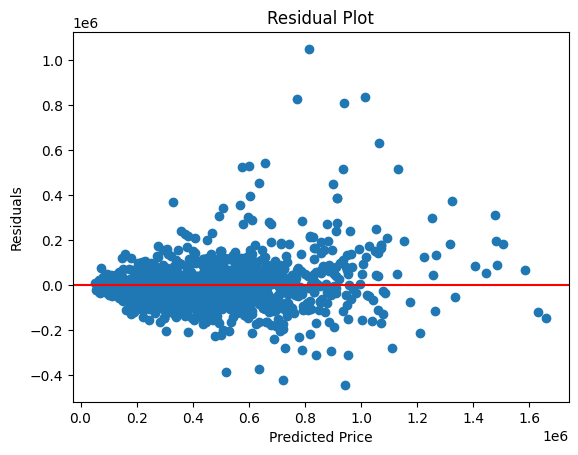

In [52]:
# plot residual plot for actual vs predicted price
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [79]:
# We can see that most predictions are close to the red line which means is doing a good job overall.
# More spread as price increases (right side)
# Model has larger errors for expensive cars, which is normal. These prices are harder to predict and less frequent in the dataset.

In [78]:
# Find all the brand columns
df['brand'].value_counts()
Number_of_brands = df['brand'].value_counts().index.tolist()
Number_of_brands

['Maruti',
 'Hyundai',
 'Mahindra',
 'Tata',
 'Honda',
 'Ford',
 'Toyota',
 'Chevrolet',
 'Renault',
 'Volkswagen',
 'Nissan',
 'Skoda',
 'Datsun',
 'Mercedes-Benz',
 'BMW',
 'Fiat',
 'Audi',
 'Jeep',
 'Mitsubishi',
 'Volvo',
 'Jaguar',
 'Force',
 'Isuzu',
 'Ambassador',
 'Daewoo',
 'Land',
 'MG',
 'Kia',
 'Lexus',
 'Ashok',
 'Opel']

In [54]:
# Count how many times they are in the dataset
Value = df['brand'].value_counts().tolist()
Value

[2090,
 1214,
 709,
 633,
 361,
 353,
 324,
 216,
 206,
 173,
 73,
 69,
 57,
 46,
 45,
 39,
 33,
 22,
 11,
 9,
 8,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 1,
 1,
 1]

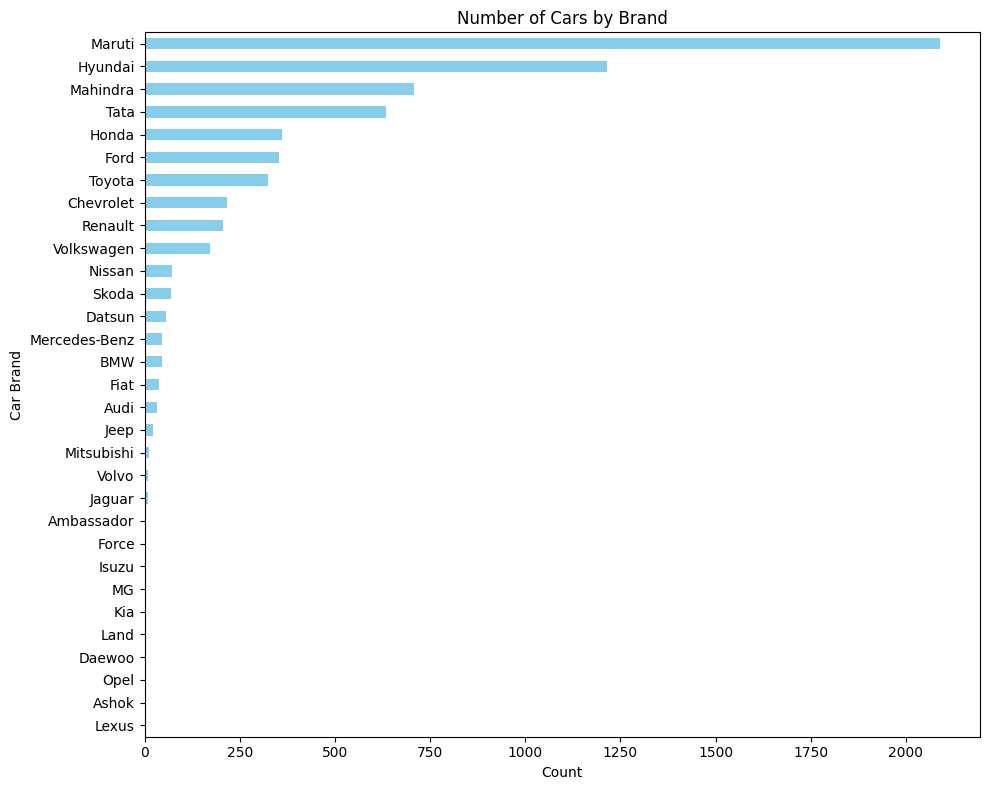

In [77]:
# horizaontal bar chart of the most common cars

brand_counts = df['brand'].value_counts()

plt.figure(figsize=(10, 8))
brand_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title("Number of Cars by Brand")
plt.xlabel("Count")
plt.ylabel("Car Brand")
plt.tight_layout()
plt.show()

In [56]:
# now make 2 charts of the most common models and the most high priced brands
df['model'].value_counts()
Number_of_models = df['model'].value_counts().index.tolist()
Number_of_models

['Swift Dzire VDI',
 'Alto 800 LXI',
 'Alto LXi',
 'Swift VDI',
 'Alto K10 VXI',
 'EON Era Plus',
 'Wagon R VXI BS IV',
 'Alto LX',
 'Ertiga VDI',
 'Ritz VDi',
 'Swift Dzire VXI',
 '800 AC',
 'Swift VDI BSIV',
 'Swift Dzire VDi',
 'KWID RXT',
 'EON Magna Plus',
 'Verna 1.6 SX',
 'Figo Diesel Titanium',
 'Alto 800 VXI',
 'Wagon R LXI Minor',
 'Alto K10 2010-2014 VXI',
 'XUV500 W6 2WD',
 'i10 Magna',
 'Vento Diesel Highline',
 'i10 Sportz',
 'Santro Xing GLS',
 'Swift VXI',
 'Grand i10 Sportz',
 'Bolero 2011-2019 SLX',
 'Verna 1.6 SX CRDi (O)',
 'Swift Dzire ZDI',
 'Wagon R LXI',
 'XUV500 W8 2WD',
 'Eeco 5 Seater AC BSIV',
 'Alto LXi BSIII',
 'XUV500 W10 2WD',
 'Ertiga ZDI',
 'i10 Era',
 'Tiago 1.2 Revotron XZ',
 'Beat Diesel LT',
 'City 2017-2020 GXi',
 '800 Std',
 'Swift Vdi BSIII',
 'Duster 110PS Diesel RxZ',
 'Beat LT',
 'TUV 300 T8',
 'KWID 1.0 RXT Optional',
 'Ertiga SHVS VDI',
 'Spark 1.0 LT',
 'Celerio VXI',
 'i10 Magna 1.1L',
 'Swift Dzire VXi',
 'Bolero 2011-2019 ZLX',
 'Grand 

In [57]:
Value = df['model'].value_counts().tolist()
Value

[118,
 76,
 69,
 60,
 47,
 44,
 43,
 43,
 42,
 40,
 37,
 37,
 34,
 33,
 30,
 30,
 29,
 27,
 27,
 27,
 27,
 26,
 26,
 25,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 22,
 22,
 21,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,


<ipython-input-58-79b8f0b7e3f0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.values, y=top_models.index, palette='viridis')


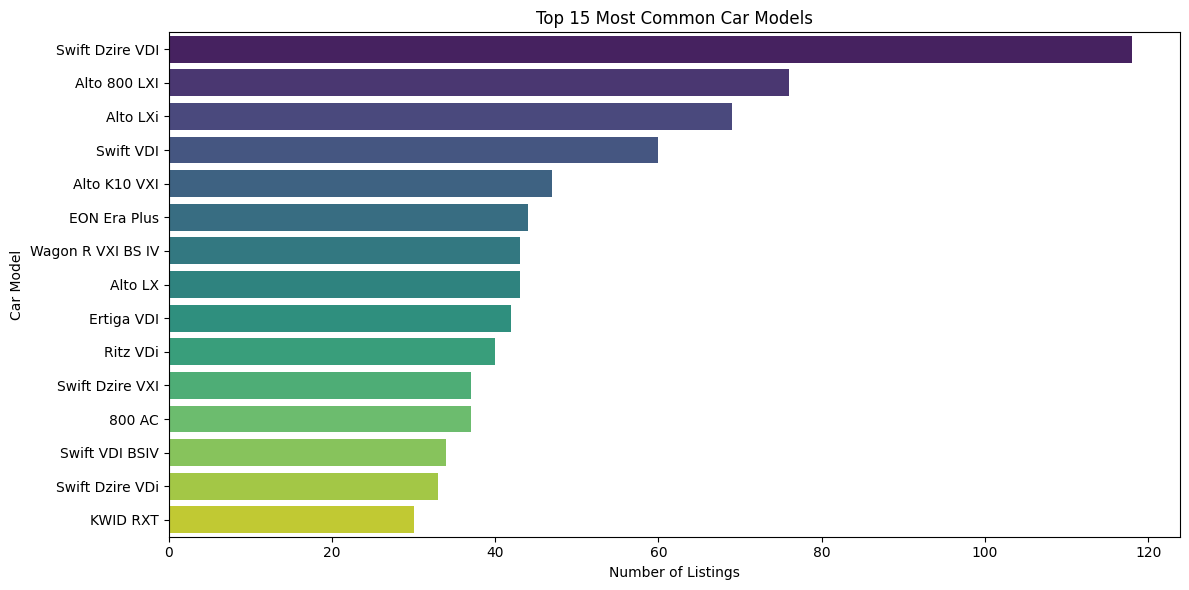

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count top 15 most common models
top_models = df['model'].value_counts().head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_models.values, y=top_models.index, palette='viridis')
plt.title("Top 15 Most Common Car Models")
plt.xlabel("Number of Listings")
plt.ylabel("Car Model")
plt.tight_layout()
plt.show()


<ipython-input-76-97103889f1cd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_price.values, y=model_price.index, palette='magma')


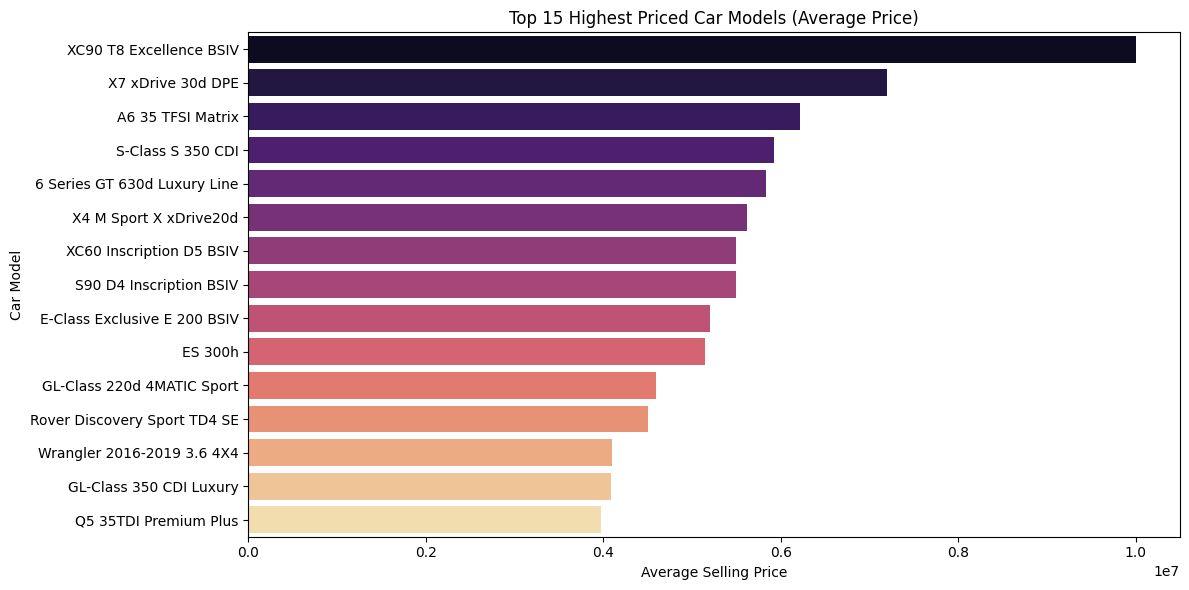

In [76]:
# Get average price per model
model_price = df.groupby('model')['selling_price'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=model_price.values, y=model_price.index, palette='magma')
plt.title("Top 15 Highest Priced Car Models (Average Price)")
plt.xlabel("Average Selling Price")
plt.ylabel("Car Model")
plt.tight_layout()
plt.show()


In [72]:
# Now sort the models that correspond to the chart
top_models_counts = df['model'].value_counts().head(15)

# Create a DataFrame to hold model and brand
top_model_brands = df[df['model'].isin(top_models_counts.index)][['model', 'brand']].drop_duplicates()

# Add a 'count' column to sort
top_model_brands = top_model_brands.merge(top_models_counts.rename('count'), on='model')
top_model_brands = top_model_brands.sort_values(by='count', ascending=False).set_index('model')

print("📌 Top 15 Most Common Models and their Brands (Sorted):")
print(top_model_brands[['brand']])


📌 Top 15 Most Common Models and their Brands (Sorted):
                     brand
model                     
Swift Dzire VDI     Maruti
Alto 800 LXI        Maruti
Alto LXi            Maruti
Swift VDI           Maruti
Alto K10 VXI        Maruti
EON Era Plus       Hyundai
Wagon R VXI BS IV   Maruti
Alto LX             Maruti
Ertiga VDI          Maruti
Ritz VDi            Maruti
Swift Dzire VXI     Maruti
800 AC              Maruti
Swift VDI BSIV      Maruti
Swift Dzire VDi     Maruti
KWID RXT           Renault


In [74]:
# Now sort the models that correspond to the chart
top_price_models = df.groupby('model')['selling_price'].mean().sort_values(ascending=False).head(15)

top_price_brands = df[df['model'].isin(top_price_models.index)][['model', 'brand']].drop_duplicates()

top_price_brands = top_price_brands.merge(top_price_models.rename('avg_price'), on='model')

top_price_brands = top_price_brands.sort_values(by='avg_price', ascending=False).set_index('model')

print("💰 Top 15 Highest Priced Models and their Brands (Sorted):")
print(top_price_brands[['brand']])


💰 Top 15 Highest Priced Models and their Brands (Sorted):
                                      brand
model                                      
XC90 T8 Excellence BSIV               Volvo
X7 xDrive 30d DPE                       BMW
A6 35 TFSI Matrix                      Audi
S-Class S 350 CDI             Mercedes-Benz
6 Series GT 630d Luxury Line            BMW
X4 M Sport X xDrive20d                  BMW
XC60 Inscription D5 BSIV              Volvo
S90 D4 Inscription BSIV               Volvo
E-Class Exclusive E 200 BSIV  Mercedes-Benz
ES 300h                               Lexus
GL-Class 220d 4MATIC Sport    Mercedes-Benz
Rover Discovery Sport TD4 SE           Land
Wrangler 2016-2019 3.6 4X4             Jeep
GL-Class 350 CDI Luxury       Mercedes-Benz
Q5 35TDI Premium Plus                  Audi


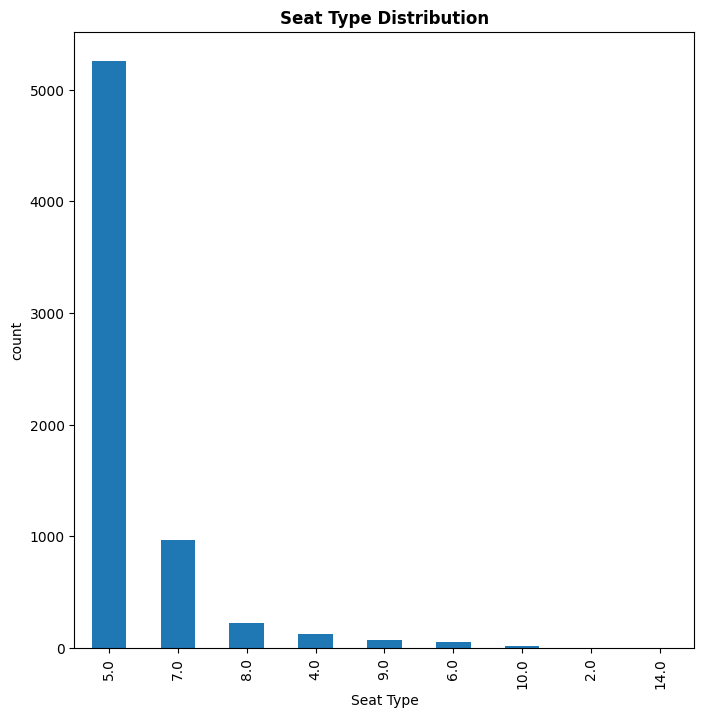

In [75]:
# Fix this make it better
plt.figure(figsize=(8,8))
df['seats'].value_counts().plot(kind='bar')
plt.title('Seat Type Distribution', weight='bold')
plt.ylabel('count')
plt.xlabel('Seat Type')
plt.show()